## Audio Classification Data Processing

In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='audio/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


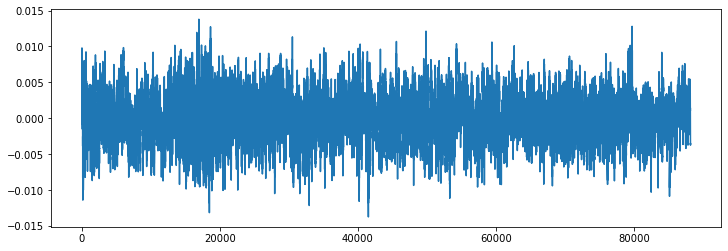

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Observation

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

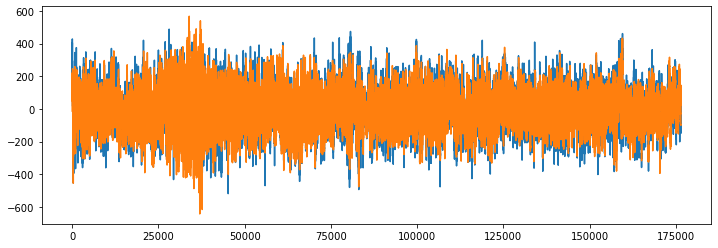

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.45197266e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513962e+02,  1.11970398e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260937e+01, -2.30021896e+01, -3.12500191e+01, ...,
        -9.15441895e+00, -1.03232269e+01, -7.39410734e+00],
       ...,
       [-7.82766533e+00, -5.03880453e+00, -4.48165083e+00, ...,
        -1.90692782e-01,  4.34143972e+00,  1.00339069e+01],
       [-1.91763544e+00, -8.02737415e-01, -1.20930791e+00, ...,
        -1.23640239e-01,  2.90504694e-02,  9.22017097e-01],
       [-3.88128936e-01,  3.09316695e-01,  6.72155762e+00, ...,
        -2.33736587e+00, -4.25179911e+00, -2.31322765e+00]], dtype=float32)

In [9]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='audio'
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])


3555it [04:03, 12.90it/s]D:\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [09:19, 21.30it/s]D:\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
D:\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [09:45, 14.91it/s]


In [12]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [13]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
X.shape

(8732, 40)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787224e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521875e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766800e-01,  7.8490514e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530846e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321609e+00]], dtype=float32)

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
X_train.shape

(6985, 40)

In [23]:
X_test.shape

(1747, 40)

In [24]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

# Model Creation

In [27]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
### No of classes
num_labels=y.shape[1]

In [30]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [33]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

History = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 10.0923 - accuracy: 0.1260 - val_loss: 2.2828 - val_accuracy: 0.1311

Epoch 00001: val_loss improved from inf to 2.28281, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 2.5660 - accuracy: 0.1223 - val_loss: 2.2760 - val_accuracy: 0.1185

Epoch 00002: val_loss improved from 2.28281 to 2.27595, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 2.3247 - accuracy: 0.1334 - val_loss: 2.2403 - val_accuracy: 0.1368

Epoch 00003: val_loss improved from 2.27595 to 2.24034, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 2.2729 - accuracy: 0.1278 - val_loss: 2.2148 - val_accuracy: 0.1345

Epoch 00004: val_loss improved from 2.24034 to 2.21484, saving model to saved_models\audio_cla

219/219 [==============================] - 0s 2ms/step - loss: 1.2375 - accuracy: 0.5808 - val_loss: 1.0634 - val_accuracy: 0.6583

Epoch 00034: val_loss did not improve from 1.06073
Epoch 35/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2345 - accuracy: 0.5850 - val_loss: 1.0496 - val_accuracy: 0.6548

Epoch 00035: val_loss improved from 1.06073 to 1.04958, saving model to saved_models\audio_classification.hdf5
Epoch 36/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2142 - accuracy: 0.5884 - val_loss: 1.0484 - val_accuracy: 0.6525

Epoch 00036: val_loss improved from 1.04958 to 1.04835, saving model to saved_models\audio_classification.hdf5
Epoch 37/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2039 - accuracy: 0.5908 - val_loss: 1.0303 - val_accuracy: 0.6806

Epoch 00037: val_loss improved from 1.04835 to 1.03025, saving model to saved_models\audio_classification.hdf5
Epoch 38/100
219/219 [===========================

219/219 [==============================] - 1s 2ms/step - loss: 1.0117 - accuracy: 0.6664 - val_loss: 0.8326 - val_accuracy: 0.7367

Epoch 00070: val_loss did not improve from 0.81579
Epoch 71/100
219/219 [==============================] - 1s 3ms/step - loss: 0.9951 - accuracy: 0.6699 - val_loss: 0.8445 - val_accuracy: 0.7344

Epoch 00071: val_loss did not improve from 0.81579
Epoch 72/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0052 - accuracy: 0.6654 - val_loss: 0.8259 - val_accuracy: 0.7367

Epoch 00072: val_loss did not improve from 0.81579
Epoch 73/100
219/219 [==============================] - 1s 3ms/step - loss: 1.0180 - accuracy: 0.6640 - val_loss: 0.8228 - val_accuracy: 0.7355

Epoch 00073: val_loss did not improve from 0.81579
Epoch 74/100
219/219 [==============================] - 1s 2ms/step - loss: 0.9998 - accuracy: 0.6661 - val_loss: 0.8235 - val_accuracy: 0.7453

Epoch 00074: val_loss did not improve from 0.81579
Epoch 75/100
219/219 [===========

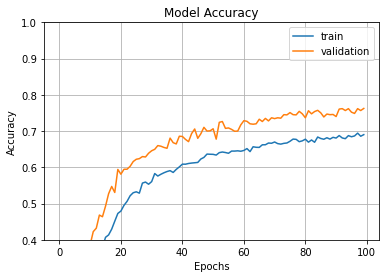

In [34]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [35]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7624499201774597


In [36]:
filename="100032-3-0-0.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9], dtype=int64)

In [37]:
prediction_feature.shape

(1, 40)

In [38]:
X_test[1]

array([-466.1843    ,    1.5388283 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.7415805 ,  -15.999888  ,
        -21.354334  ,    7.650683  ,  -29.031452  ,  -19.142824  ,
         -2.6798916 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.8877535 ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015268 ,    2.9139898 ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.655298  ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.4198    ,   -0.57916117,
         -1.2440344 ,   17.722294  ,   13.837573  ,   -5.1643486 ],
      dtype=float32)

In [39]:
model.predict_classes(X_test)

array([5, 3, 4, ..., 1, 2, 2], dtype=int64)

# Testing Some Test Audio Data

In [44]:
filename="100032-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.1579301e+02  7.1666122e+01 -1.3181377e+02 -5.2091328e+01
 -2.2115967e+01 -2.1764179e+01 -1.1183746e+01  1.8912683e+01
  6.7266383e+00  1.4556894e+01 -1.1782045e+01  2.3010368e+00
 -1.7251303e+01  1.0052423e+01 -6.0094995e+00 -1.3153188e+00
 -1.7693510e+01  1.1171225e+00 -4.3699460e+00  7.2629538e+00
 -1.1815969e+01 -7.4952617e+00  5.4577127e+00 -2.9442446e+00
 -5.8693881e+00 -9.8653689e-02 -3.2121704e+00  4.6092515e+00
 -5.8293266e+00 -5.3475080e+00  1.3341198e+00  7.1307821e+00
 -7.9449996e-02  1.7109245e+00 -5.6941996e+00 -2.9041710e+00
  3.0366950e+00 -1.6827590e+00 -8.8585860e-01  3.5438877e-01]
[[-2.1579301e+02  7.1666122e+01 -1.3181377e+02 -5.2091328e+01
  -2.2115967e+01 -2.1764179e+01 -1.1183746e+01  1.8912683e+01
   6.7266383e+00  1.4556894e+01 -1.1782045e+01  2.3010368e+00
  -1.7251303e+01  1.0052423e+01 -6.0094995e+00 -1.3153188e+00
  -1.7693510e+01  1.1171225e+00 -4.3699460e+00  7.2629538e+00
  -1.1815969e+01 -7.4952617e+00  5.4577127e+00 -2.9442446e+00
  -5.8693881e+00 

array(['dog_bark'], dtype='<U16')